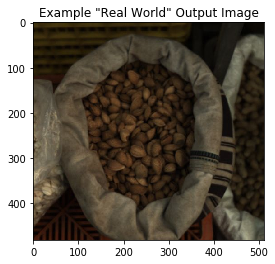

In [4]:
import cv2 as cv
import numpy as np


from scipy.io import loadmat
from matplotlib import pyplot as plt
from os.path import basename,join,splitext
from SpectralUtils import saveJPG, demosaic, addNoise, projectToRGBMosaic

# Example noise parameters
# ! IMPORTANT !
# Actual challenge images will be generated with different parameters
DARK_NOISE = 10 
TARGET_NPE = 5000

filePath= "./resources/sample_hs_img_001.mat"
# ! IMPORTANT !
# Actual challenge images will be generated with a confidential camera response function, the filter
# used below is included as an example 
filtersPath = "./resources/example_D40_camera_w_gain.npz"
savePath = "./output/"

# Loading HS image and filters    
cube = loadmat(filePath)['cube']
filters = np.load(filtersPath)['filters']

# Apply "Real World" simulated camera pipeline:
# 1. Project to RGGB mosaic image (simulate sensor color filter array)
# 2. Add noise
# 3. Demosaic
im = projectToRGBMosaic(cube,filters)
im = addNoise(im, DARK_NOISE, TARGET_NPE)
im = demosaic(im)

# Save image file
fileName = splitext(basename(filePath))[0]
path = join(savePath, fileName +'_realWorld.jpg')
saveJPG(im,path)

# Display RGB image
img = cv.imread(path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('Example "Real World" Output Image')
plt.show()

